### Случайный лес

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [34]:
data=pd.read_csv('data_trees.csv')
data.drop(data.filter(regex="Unname"),axis=1, inplace=True)

In [35]:
data.head(10)

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
0,1,0.0,0.00,0.00,4.0,7.0,35.0,3,1,0.46,...,1.0,0,0,0,0,0,18.8,7.1,1,2
1,1,0.0,0.00,0.00,6.0,8.0,64.0,1,0,0.14,...,1.0,1,0,79,0,0,19.6,15.7,2,2
2,1,1.0,0.24,0.78,3.0,8.0,26.0,2,0,0.03,...,1.0,0,1,110,0,0,26.4,9.6,1,1
3,0,0.0,0.00,0.00,5.0,2.0,55.0,3,0,0.16,...,1.0,0,0,0,0,0,52.6,18.1,1,4
4,1,1.0,0.18,0.91,5.0,5.0,43.0,3,1,0.60,...,3.0,1,1,0,0,0,8.3,13.4,3,1
5,1,1.0,0.16,0.74,7.0,10.0,64.0,3,0,0.60,...,1.0,1,1,42,0,0,13.8,3.6,2,1
6,0,0.0,0.00,0.00,6.0,3.0,36.0,1,0,0.00,...,1.0,1,0,0,0,0,67.2,0.9,2,4
7,1,1.0,0.07,0.85,7.0,6.0,47.0,3,0,0.42,...,3.0,1,1,117,0,0,29.7,5.9,4,1
8,0,1.0,0.08,0.20,7.0,1.0,61.0,1,0,0.53,...,1.0,0,1,26,0,1,60.7,7.1,1,3
9,1,0.0,0.00,0.00,2.0,8.0,71.0,3,0,0.52,...,1.0,1,0,0,1,0,24.8,13.6,2,2


In [36]:
data.columns

Index(['Answer', 'inn_act', 'novelty', 'inn_prod', 'size', 'climate', 'age',
       'competition', 'technologe_acq', 'RD', 'market', 'novelty_tech',
       'marketing_inn', 'organizational_inn', 'main_ag', 'Int_property',
       'boss_experience', 'papers', 'wifi', 'MBA', 'passport', 'mortgage',
       'green', 'Type'],
      dtype='object')

__Описание переменных__. 

__Answer__ - компания инновационно-активная в 2018 году (0 -нет, 1 -да)

__age__ - возраст руководителя в 2017 году    

__boss_experience__ – наличие успешного опыта у руководителя предприятия по 
реализации инновационных проектов по оценке сотрудников (0-нет, 1 -да)  

__climate__ - оценка предприятием условий для создания и распространения инноваций на рынке (10- максимально благоприятные, 0 - крайне неблагоприятные)    

__competition__- оценка компанией степени конкуренции на рынке (1- минимум, 5- максимум)  

__green__ – озелененность территории (до 5 баллов, 5 баллов -максимум)  

__inn_act__ - компания инновационно-активная в 2017 году (0-нет, 1-да)

__inn_prod__ - доля продаж инновационной продукции в общем объеме продаж компании

__Int_property__ – оценка предприятием степени надежности защиты интеллектуальной 

собственности (0-недостаточная защита, 1- надежная защита)   

__main_ag__ - расположение головной организации (1- Россия, 2- в странах СНГ, 3- в странах ЕС, 4- США, Канада, 5- другое)

__market__ – наиболее важный рынок сбыта для компании 1- местный, региональный, 2-общероссийский, 3-стран СНГ, 4 – европейский, 5 –другие

__marketing_inn__ - осуществляла ли компания маркетинговые инновации в 2017 году (0 -нет, 1-да)

__MBA__ – наличие степени MBA у руководителя предприятия  

__mortgage__ – доля сотрудников предприятия, у которых есть ипотечные кредиты  

__novelty__ - доля продаж новой для рынка инновационной продукции в общем объеме продаж инновационной продукции компании в 2017 году (для не инновационно-активных в 2017 году – 0)

__novelty_tech__- доля продаж инновационной продукции вновь внедренной или подвергавшимся значительным изменениям в течение последних трех лет в общем объеме продаж инновационной продукции

__organizational_inn__- осуществляла ли компания организационные инновации в 2017 году (0-нет, 1 -да)  

__papers__ -  количество статей сотрудников предприятий в различных изданиях за 3   года

__passport__ – доля сотрудников предприятия, у которых оформлен заграничный паспорт 

__RD__ - доля затрат на исследования и разработку новых продуктов, услуг и методов производства в затратах на технологические инновации в 2017 году

__size__ - - размерность предприятия (от 1 до 9, в порядке возрастания количества занятых)  

Малые: 1) 37   до 49 человек; 2) 50 - 99 человек

Средние 3) 100-199 человек; 4)  200-249 человек

Крупные 5) 250 - 499 человек; 6) 500 - 999 человек; 7) 1000-4999 человек; 8) 5000 - 9999 человек; 9) от 10000 человек

__technology_acq__ - приобретала ли компания технологии в неовеществлённой форме за последние 5 лет (с 2013 по 2017) (0 – нет, 1 -да)

__wifi__ – наличие открытой сети wifi в головном офисе предприятия  


In [37]:
data.describe()

,Answer,inn_act,novelty,inn_prod,size,climate,age,competition,technologe_acq,RD,...,main_ag,Int_property,boss_experience,papers,wifi,MBA,passport,mortgage,green,Type
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,0.444041,0.481831,0.096628,0.237834,4.694767,5.073401,49.212936,2.907703,0.248547,0.265182,...,1.180233,0.438227,0.481831,34.103198,0.236192,0.061773,37.581468,9.246076,1.521802,2.630087
std,0.497039,0.499851,0.154323,0.304236,2.526917,3.138220,14.090683,1.240902,0.432327,0.206641,...,0.647963,0.496350,0.499851,42.736447,0.424896,0.240831,19.042908,5.432982,0.663515,1.267414
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,38.000000,2.000000,0.000000,0.070000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.900000,4.400000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,51.000000,3.000000,0.000000,0.250000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,36.500000,9.100000,1.000000,3.000000
75%,1.000000,1.000000,0.130000,0.480000,7.000000,8.000000,61.000000,4.000000,0.000000,0.430000,...,1.000000,1.000000,1.000000,69.000000,0.000000,0.000000,50.750000,13.925000,2.000000,4.000000
max,1.000000,1.000000,0.790000,0.930000,9.000000,10.000000,72.000000,5.000000,1.000000,0.670000,...,5.000000,1.000000,1.000000,133.000000,1.000000,1.000000,87.200000,18.900000,5.000000,4.000000


### Сбалансирована ли выборка?

In [38]:
non_innovative=0
for i in range(0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==0:
        non_innovative+=1
        i+=1

past_innovative=0       
for i in range(0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==1:
        past_innovative+=1
        i+=1       

new_innovative=0
for i in range(0, len(data.Answer)):
    if data.Answer[i]==1 and data.inn_act[i]==0:
        new_innovative+=1
        i+=1  

innovative=0
for i in range(0, len(data.Answer)):
    if data.Answer[i]==1 and data.inn_act[i]==1:
        innovative+=1
        i+=1    

print({"неинновационные предприятия": non_innovative})
print({"завершившие инновационную деятельность предприятия":past_innovative})
print({'начавшие инновационную деятельность предприятия': new_innovative})
print({"инновационные предприятия": innovative})

{'неинновационные предприятия': 523}
{'завершившие инновационную деятельность предприятия': 242}
{'начавшие инновационную деятельность предприятия': 190}
{'инновационные предприятия': 421}


In [39]:
# Ваш код без циклов

non_innovative, innovative, past_innovative, new_innovative = data[['Answer', 'inn_act']].value_counts()

print({"неинновационные предприятия": non_innovative})
print({"завершившие инновационную деятельность предприятия":past_innovative})
print({'начавшие инновационную деятельность предприятия': new_innovative})
print({"инновационные предприятия": innovative})

{'неинновационные предприятия': 523}
{'завершившие инновационную деятельность предприятия': 242}
{'начавшие инновационную деятельность предприятия': 190}
{'инновационные предприятия': 421}


## Отличия характеристик предприятий в зависимости от статуса инновационной активности

In [40]:
Type=np.random.randint(5,7, len(data.Answer))
for i in range(0, len(data.Answer)):
    if data.Answer[i]==0 and data.inn_act[i]==0:
        Type[i]=4
    if data.Answer[i]==0 and data.inn_act[i]==1:
        Type[i]=3
    if data.Answer[i]==1 and data.inn_act[i]==0:
        Type[i]=2
    if data.Answer[i]==1 and data.inn_act[i]==1:
        Type[i]=1
data['Type']=Type

In [41]:
# Ваш код без циклов

conditions = [
    (data['Answer'] == 0) & (data['inn_act'] == 0),
    (data['Answer'] == 0) & (data['inn_act'] == 1),
    (data['Answer'] == 1) & (data['inn_act'] == 0),
    (data['Answer'] == 1) & (data['inn_act'] == 1),
]

choices = [4, 3, 2, 1]

data['Type'] = np.select(conditions, choices)

### Доля продаж инновационной продукции среди всех продаж предприятия

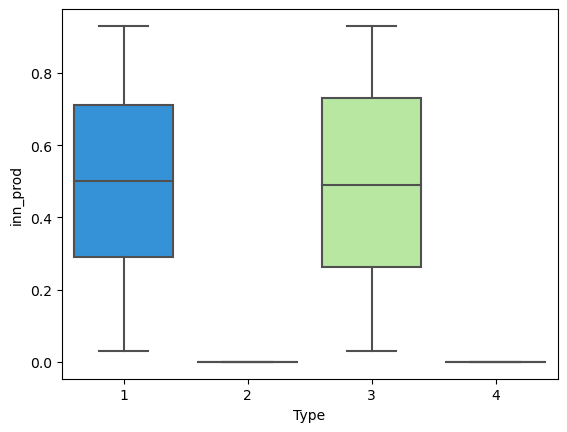

In [42]:
sns.boxplot(x="Type", y="inn_prod", data=data, palette='rainbow');

In [72]:
# Интерпретация

Продажи инновационной продукции есть только у инновационных предприятий, и предприятий, завершивших инновационную деятельность. Причем распределение у них визуально очень похоже 

### Рыночная новизна продукции

<Axes: xlabel='Type', ylabel='novelty'>

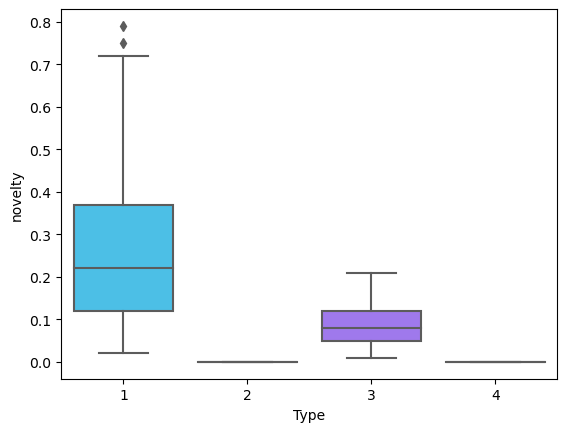

In [73]:
sns.boxplot(x="Type", y="novelty", data=data, palette='cool')

In [45]:
# Интерпретация

Инновационные предприятия выпускают как новую для рынка продукцию, так и старую, когда как предприятия, завершившие инновационную деятельность - преимущественно старую продукцию 

Text(0, 0.5, 'Novelty')

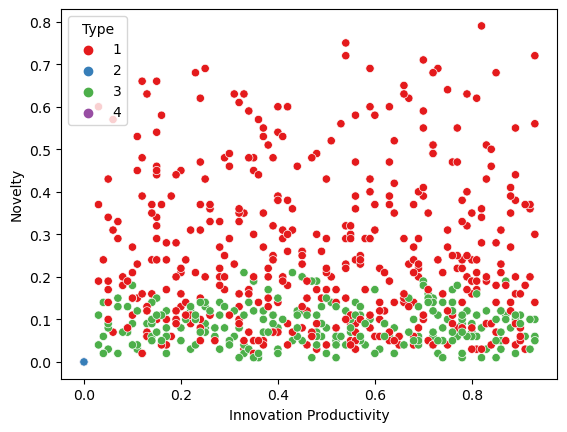

In [86]:
sns.scatterplot(
    x=data.inn_prod, 
    y=data.novelty, 
    hue=data.Type, 
    palette='Set1'
)
plt.xlabel('Innovation Productivity') 
plt.ylabel('Novelty')  

In [47]:
# Объяснить, почему нет зависимости

С ростом доли иновационных продуктов, распределение количества новой для рынка продукции не меняется. Основной костяк наблюдений находится в точке (0,0), 

###  Технологичнская новизна продукции

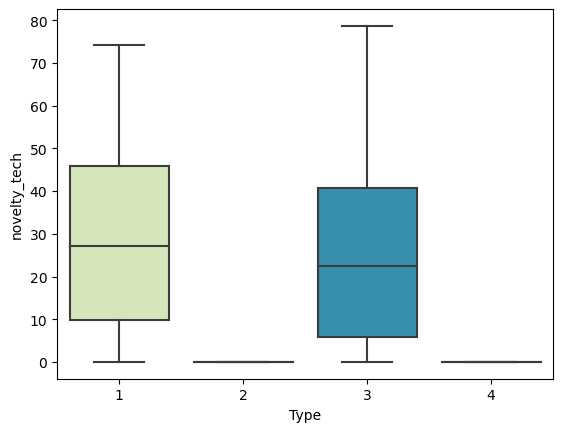

In [48]:
sns.boxplot(x="Type", y="novelty_tech", data=data, palette='YlGnBu');

### Затраты на исследования и разработку новой продукции

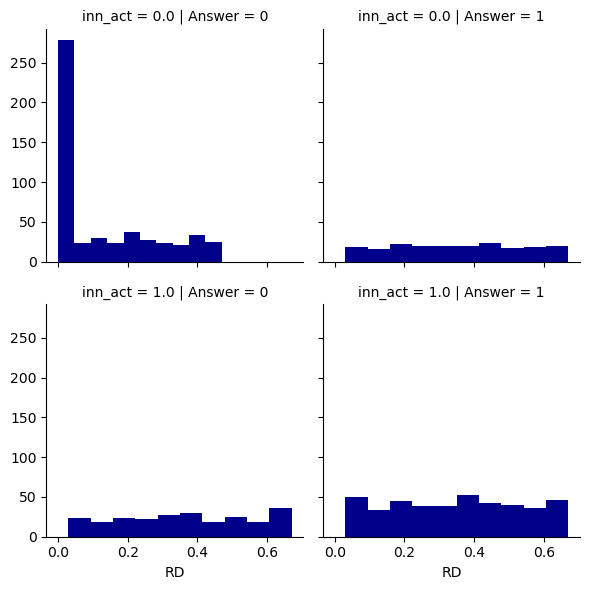

In [49]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "RD", color='darkblue');

In [50]:
# Интерпретация

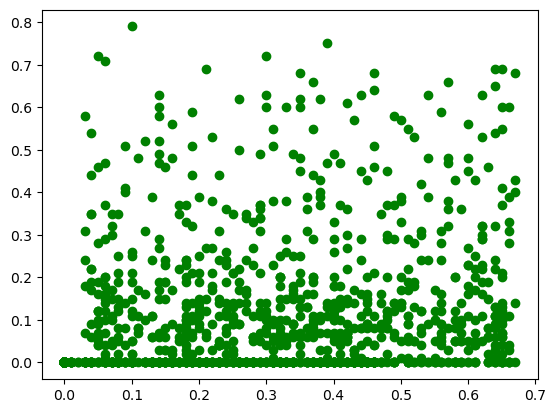

In [51]:
plt.scatter(data.RD, data.novelty, color='green')

In [52]:
# Интерпретация и объяснения отсутсвитя зависимости

### Оценка делового климата

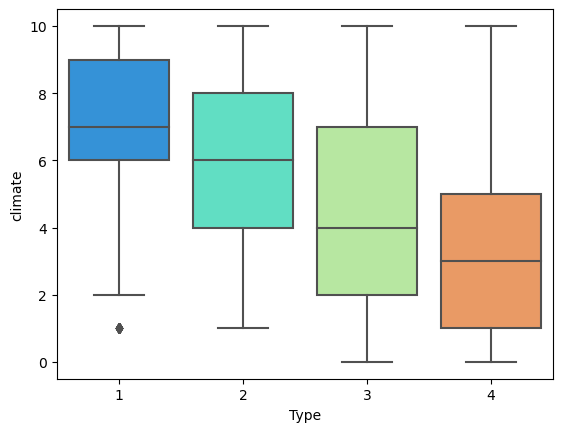

In [53]:
sns.boxplot(x="Type", y="climate", data=data, palette='rainbow');

In [54]:
# Интерпретация

### Оценка уровня конкуренции

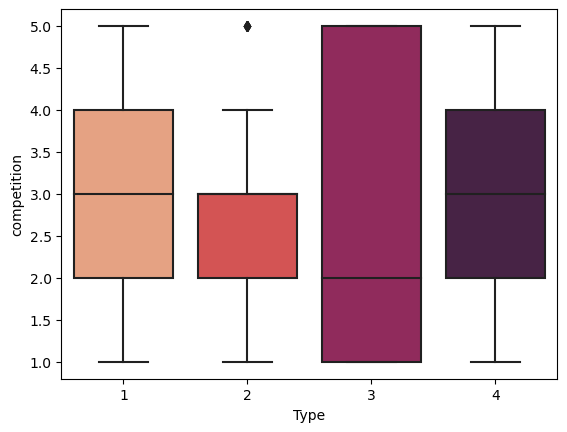

In [55]:
sns.boxplot(x="Type", y="competition", data=data, palette='rocket_r');

In [56]:
# Интерпретация

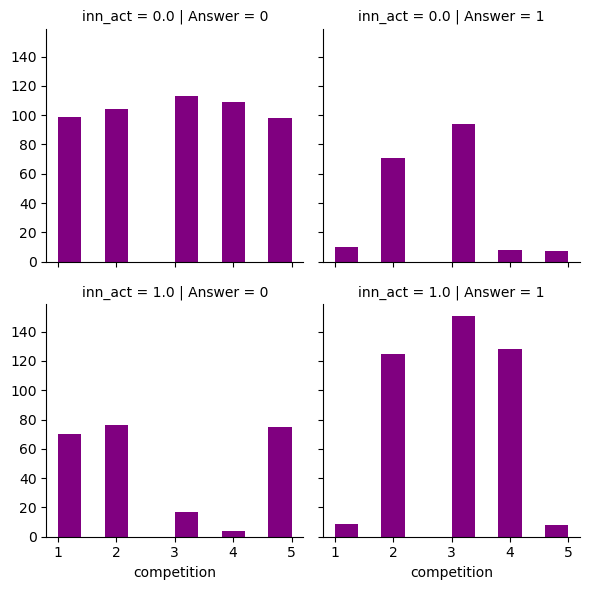

In [57]:
g = sns.FacetGrid(data, col="Answer", row="inn_act")
g = g.map(plt.hist, "competition", color='Purple');

In [58]:
# Интерпретация

# Обучение модели случайного леса (без отбора показателей)

In [59]:
from sklearn import ensemble, model_selection, metrics 
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [60]:
Answer = data.Answer
others_data = data.iloc[:, 1:]
others_data=others_data.drop(columns=['Type'])

In [61]:
classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [62]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_low_depth, others_data, Answer, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=42)

classifier_low_depth.fit (X_train, y_train)
tree_low = classifier_low_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_low, out_file = 'tree_low.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_low.dot')

graph.write_png('tree_low.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

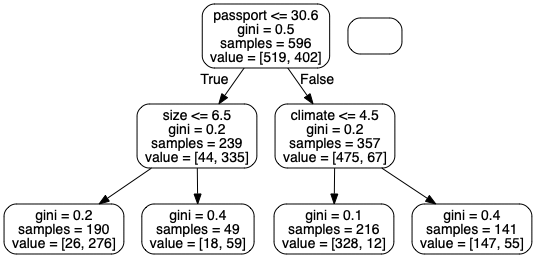

In [ ]:
from IPython import display
display.Image("tree_low.png")

In [ ]:
print (train_sizes)
print (train_scores.mean(axis = 1))
print (test_scores.mean(axis = 1))

[ 91 275 458 641 825]
[0.94871795 0.9430303  0.93668122 0.93083723 0.93373737]
[0.88809608 0.9077055  0.92152106 0.92442751 0.92079484]


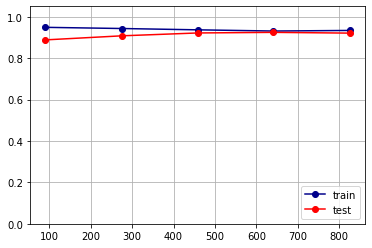

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'darkblue', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [ ]:
classifier_low_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [ ]:
classifier_low_depth.score(X_test, y_test)

0.9208791208791208

In [ ]:
# Подробное описание кода

In [ ]:
classifier_high_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 10)

In [ ]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(classifier_high_depth, others_data, Answer, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

In [ ]:

classifier_high_depth.fit (X_train, y_train)
tree_high = classifier_high_depth.estimators_[5]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(tree_high, out_file = 'tree_high.dot', feature_names = others_data.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_high.dot')
# Записываем граф в png file
graph.write_png('tree_high.png')

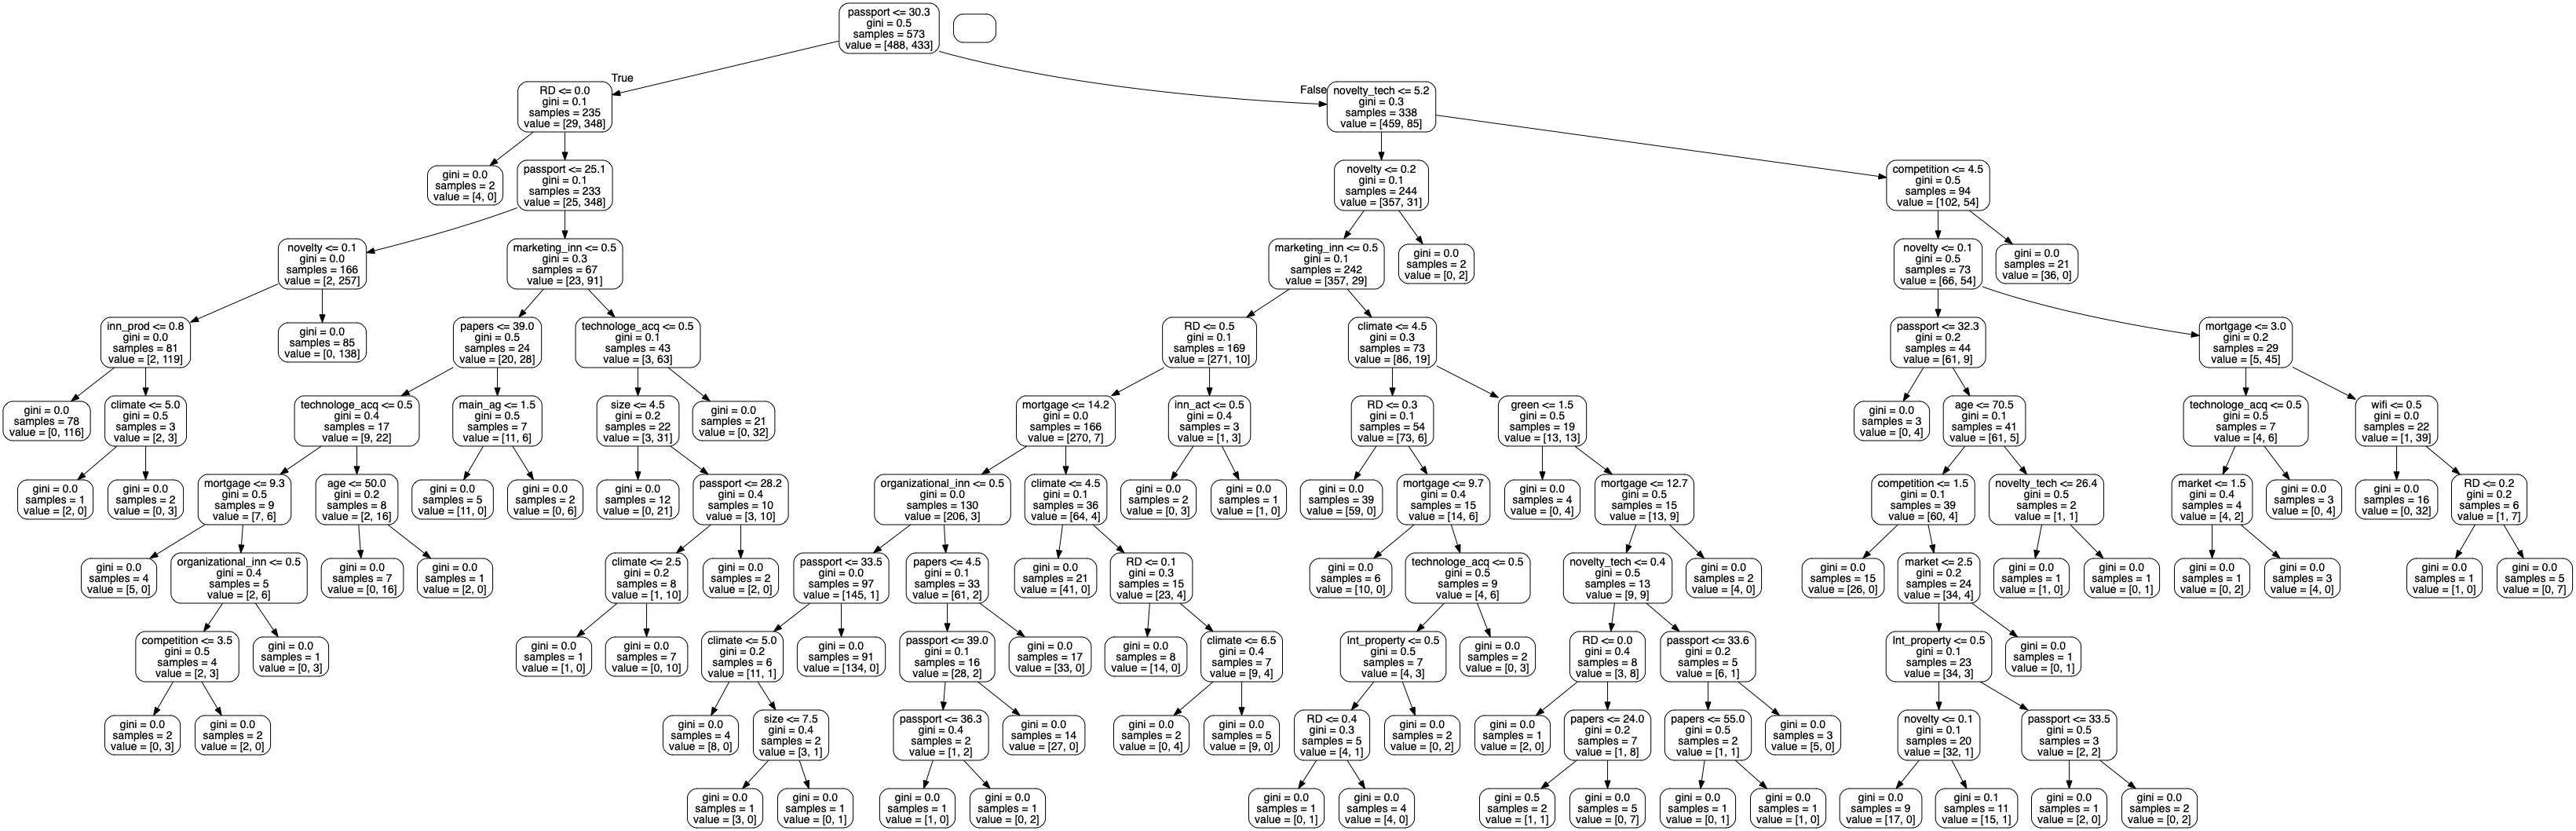

In [ ]:
from IPython import display
display.Image("tree_high.png")

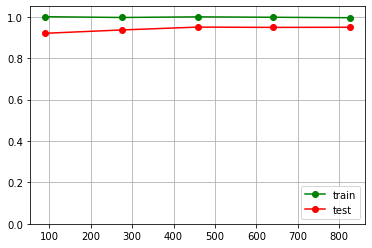

In [ ]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'green', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'red', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(others_data, Answer, test_size=0.33, random_state=10)

In [ ]:
classifier_high_depth.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=10)

In [ ]:
classifier_high_depth.score(X_test, y_test)

0.9494505494505494

In [ ]:
# Объяснение и интерпретация различий

## Значимость параметров модели

In [ ]:
imp = pd.DataFrame({'feature': list(others_data.columns),
                   'importance': classifier_high_depth.feature_importances_}).\
                    sort_values('importance', ascending = False)

imp.head(23)

,feature,importance
19,passport,0.321835
1,novelty,0.125905
7,technologe_acq,0.107175
4,climate,0.096985
8,RD,0.075844
6,competition,0.031795
10,novelty_tech,0.029192
2,inn_prod,0.027171
11,marketing_inn,0.026672
9,market,0.023344


In [ ]:
# Интерпретация

## Отбор параметров

### Удаление признаков на основании здравого смысла

In [ ]:
# selected_features_temp=others_data.drop(columns=['...', '...', '...'])

### Удаление признаков на основании коэффициентов корреляции

In [ ]:
# Ваш код

In [ ]:
# selected_features=selected_features_temp.drop(columns=['...', ...])

In [ ]:
# Обучение модели случайного леса на новых данных

In [ ]:
#Интерпретация

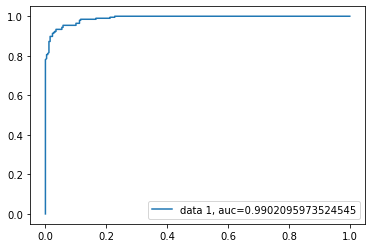

0.9902095973524545


In [ ]:
probs = classifier_high_depth.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)